In [1]:
#Aim of this analysis is to understand the factors that affect the performance of students
#Objective : How to improve the grades of the students

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Admin\Documents\Programming\dataset\StudentsPerformance.csv')

In [4]:
#Check the dimensions of the data
print("Number of rows and columns in the data set :")
data.shape

Number of rows and columns in the data set :


(1000, 8)

In [5]:
#Check the data types
print("Data type of the data set :")
data.dtypes

Data type of the data set :


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
#Get the first 5 rows of the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#Get the last 5 rows of the dataset
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
#Summary of the numerical variables
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Summary of numerical variables
data.describe(include=[object])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [10]:
#Get the number of uniquie values in all columns
print("Print the number of unique values in the data set")
data.nunique()

Print the number of unique values in the data set


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
#Rename column names for easy analysis of data
data.rename(columns = {'race/ethnicity':'race',
                     'parental level of education':'PLE',
                      'test preparation course':'TPC',
                      'math score':'math_score',
                      'reading score':'reading_score',
                      'writing score':'writing_score',
                      },inplace=True)

In [13]:
data.head()

,gender,race,PLE,lunch,TPC,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
#cleaning the data
#Check for null values in the dataset
print("Null values in the dataset")
data.isnull().sum()

Null values in the dataset


gender           0
race             0
PLE              0
lunch            0
TPC              0
math_score       0
reading_score    0
writing_score    0
dtype: int64

In [15]:
#Data wragling 
data['Total'] = data['math_score']+data['reading_score']+data['writing_score']

In [16]:
data.head()

,gender,race,PLE,lunch,TPC,math_score,reading_score,writing_score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


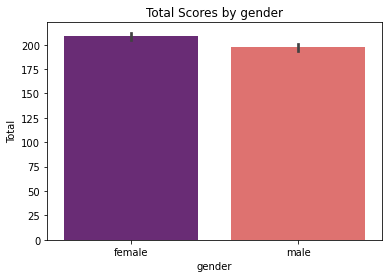

In [17]:
#Check which gender score more 
# create plot bar plot
sns.barplot(x = 'gender',y='Total', data = data, palette = 'magma')
plt.title('Total Scores by gender')
plt.show()


### Females total score is higher than males ###

In [18]:
#print the average score of maths, reading and writing

print("Average math score is    : {}".format(np.mean(data['math_score'])))
print("Average reading score is :{}".format(np.mean(data['reading_score'])))
print("Average writing score is  :{}".format(np.mean(data['writing_score'])))

Average math score is    : 66.089
Average reading score is :69.169
Average writing score is  :68.054


### Average score of maths is lower than reading and writing ###

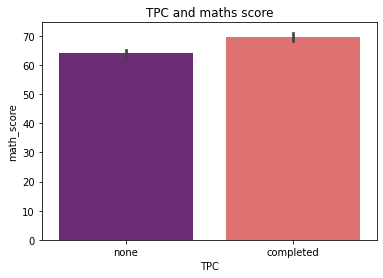

In [19]:
#maths score and TPC (test preparation course)

sns.barplot(x = 'TPC',y='math_score', data = data, palette = 'magma')
plt.title('TPC and maths score')
plt.show()


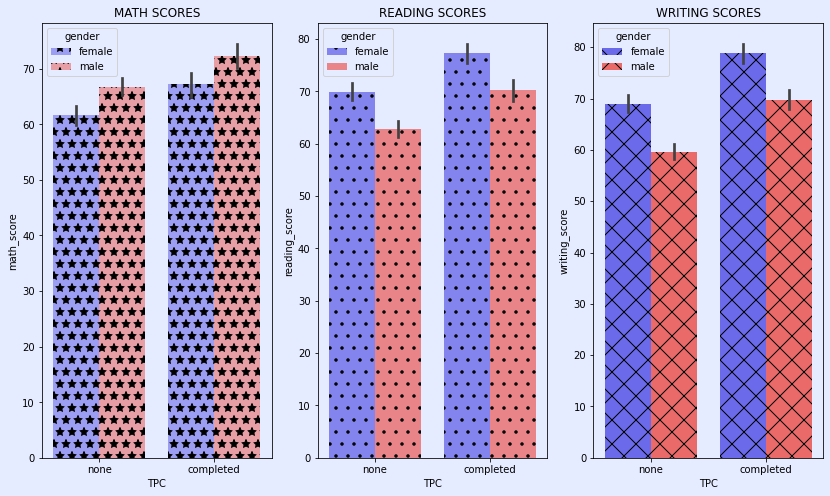

In [20]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='TPC',y='math_score',data=data,hue='gender',palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='TPC',y='reading_score',data=data,hue='gender',palette='seismic',**{'hatch':'.','alpha':0.8,'linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='TPC',y='writing_score',data=data,hue='gender',palette='seismic',**{'hatch':'x','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

### Generally students who complete the test preparation course score high
### Male students score more in maths , while female students score more in reading and writing.
### To improve the test score all students should be encouraged to complete the test preparation course

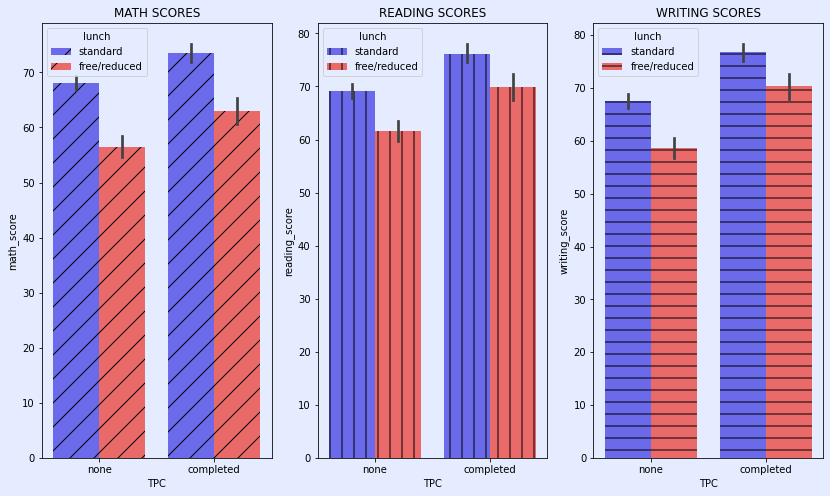

In [21]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='TPC',y='math_score',data=data,hue='lunch',palette='seismic',**{'hatch':'/','linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='TPC',y='reading_score',data=data,hue='lunch',palette='seismic',**{'hatch':'|','linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='TPC',y='writing_score',data=data,hue='lunch',palette='seismic',**{'hatch':'-','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

### Scores are high when the lunch is provided

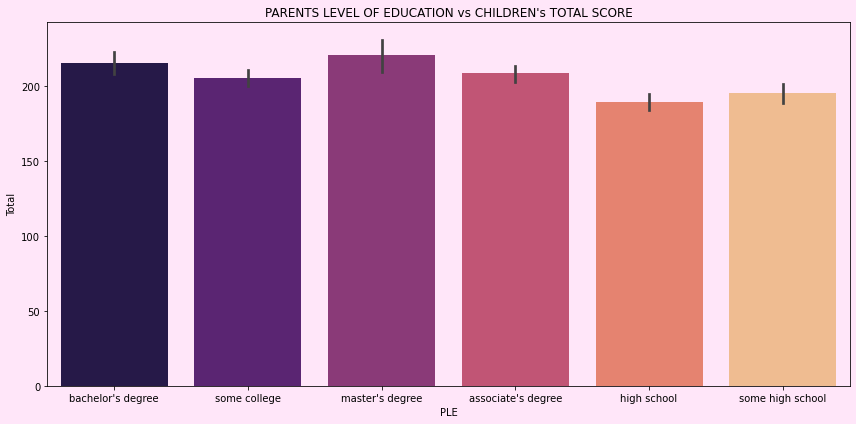

In [22]:
#Relation of parents education and students score

plt.rcParams['figure.facecolor'] = "#ffe6f9"
plt.rcParams['axes.facecolor'] = "#ffe6f9"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x=data['PLE'],y='Total',data=data,palette='magma')
plt.tight_layout()

In [23]:
#Change some high school values to high school
data['PLE']=data['PLE'].replace(['some high school'],'high school')
#df['column name'] = df['column name'].replace(['old value'], 'new value')

In [24]:
data['PLE'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

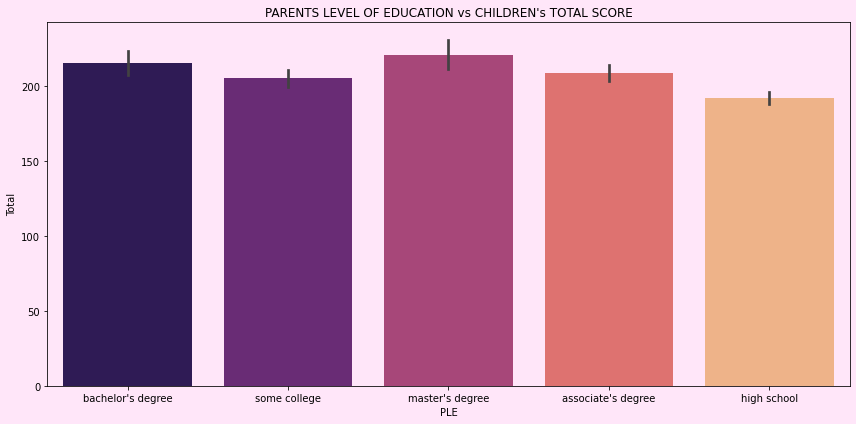

In [25]:
#Relation of parents education and students score

plt.rcParams['figure.facecolor'] = "#ffe6f9"
plt.rcParams['axes.facecolor'] = "#ffe6f9"
plt.figure(figsize=(12,6))
plt.title('PARENTS LEVEL OF EDUCATION vs CHILDREN\'s TOTAL SCORE')
sns.barplot(x=data['PLE'],y='Total',data=data,palette='magma')
plt.tight_layout()

### Total score is high for students whose parents has high qualification

In [26]:
#Check the correlation 
corr = data.corr(method = 'pearson')
corr

,math_score,reading_score,writing_score,Total
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
Total,0.918746,0.970331,0.965667,1.000000


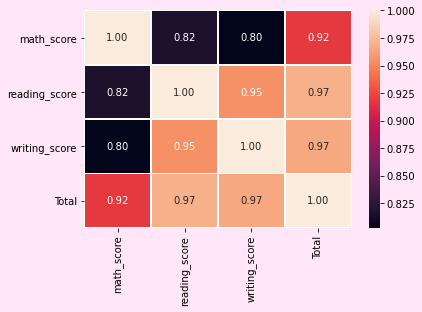

In [27]:
#plot correlation in heat map
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

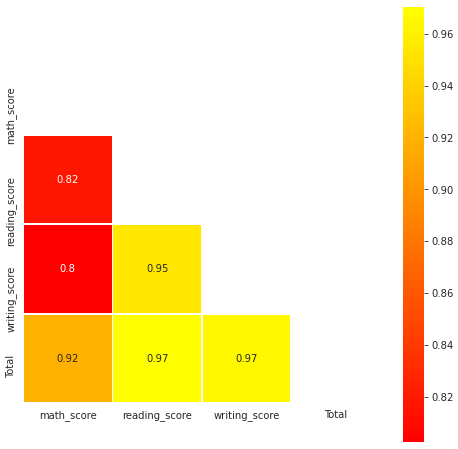

In [28]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

### Reading and writing are highly correlated to each other.
### Above shows that the student who reads well writes well.

In [29]:
#Correlation between "Total , "reading_score and writing_score " is high 
#Drop Total and writing columns

#data_new = data.drop(['Total','writing_score'],axis = 'columns',inplace = True)

In [45]:
new_data=data.copy()

In [46]:
new_data.drop(['Total','writing_score'], axis='columns', inplace=True)


In [47]:
new_data.head()

,gender,race,PLE,lunch,TPC,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [48]:
#drop race column 
new_data.drop(['race'],axis ='columns',inplace= True)

In [49]:
new_data.head()

,gender,PLE,lunch,TPC,math_score,reading_score
0,female,bachelor's degree,standard,none,72,72
1,female,some college,standard,completed,69,90
2,female,master's degree,standard,none,90,95
3,male,associate's degree,free/reduced,none,47,57
4,male,some college,standard,none,76,78


In [50]:
#Use label encoding to convert categorical values to numerical

from sklearn.preprocessing import LabelEncoder

In [52]:
# create label encoder object
le = LabelEncoder()

# apply label encoder to multiple columns
new_data[['gender', 'PLE','lunch','TPC']] = new_data[['gender', 'PLE','lunch','TPC']].apply(le.fit_transform)

In [38]:
new_data.head()

,gender,PLE,lunch,TPC,math_score,reading_score
0,0,1,1,1,72,72
1,0,4,1,0,69,90
2,0,3,1,1,90,95
3,1,0,0,1,47,57
4,1,4,1,1,76,78


In [39]:
#Get dependent and independent variables
# Trying to predict the maths score from other parameter

X = new_data.drop(['math_score'],axis = 1)
y = new_data['math_score']

In [40]:
X.head()

,gender,PLE,lunch,TPC,reading_score
0,0,1,1,1,72
1,0,4,1,0,90
2,0,3,1,1,95
3,1,0,0,1,57
4,1,4,1,1,78


In [41]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [42]:
from sklearn.linear_model import LinearRegression
#Apply linear regression to the data
reg =  LinearRegression()
# Fit the regressor to the data
reg.fit(X,y)
reg

LinearRegression()

In [43]:
#(1) Predict maths score=
y_pred = reg.predict([[0,1,1,1,70]])
y_pred

array([63.13594425])

In [44]:
#score of the model

reg.score(X,y)

0.8323830836601337